**Agenda:**
<br>
For this tutorial in  Deep Learning(DL) with Pytorch, we are going to explore Multi Layered Perceptron architecture and learn Pytorch by implementing  algorithms under a certain usecase.We will cover the following:
1. Deep Learning basics with Pytorch
2. Multilayered Perceptron (MLP) implemention on  MNIST
<br>

Lets get started !!


![](images/mlp.png)

# **1. Deep Learning basics with Pytorch**
<br>
In this part we will cover the following:

1. Learn to play with tensors on numpy and pytorch 
2. Learn to build a simple feed forward network from scratch with random data 
3. Learn to build an end to end MLP for MNIST dataset

##  Imports

In [1]:
#!pip3 install torch torchvision

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print("List of files",os.listdir("../input"))
import torch
import numpy as np
print("Torch Version:",torch.__version__)
# Any results you write to the current directory are saved as output.

Torch Version: 1.1.0


## Helper Functions

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


## Tensors
It turns out neural network computations are just a bunch of linear algebra operations on *tensors*, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

<img src="images/tensor_examples.svg" width=600px>


### Construct a randomly initialized 5x3 matrix:




In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.9768, 0.4626, 0.4697],
        [0.6264, 0.5623, 0.8074],
        [0.2413, 0.3968, 0.8782],
        [0.5647, 0.7554, 0.1240],
        [0.1027, 0.4617, 0.4611]])


### Construct a tensor directly from data:

In [4]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


### Numpy to Torch and back

PyTorch has a great feature for converting between Numpy arrays and Torch tensors. Let us see how easy it is to switch between the two

### Ceate a tensor using numpy array

In [5]:
np_array=np.random.randn(5,3)
print(f' Numpy array:\n {np_array}')

 Numpy array:
 [[-0.02647265  0.10582354  0.13038732]
 [-1.34244932  0.35982855  0.70407106]
 [ 1.52964114 -0.29781545 -0.62033849]
 [ 0.96108999 -1.24624232  1.94094033]
 [-0.51059626  0.36401938 -0.5627018 ]]


### Convert to torch tensor

In [6]:
torch_tensor=torch.from_numpy(np_array)
print(f'Torch tensor:\n {torch_tensor}')

Torch tensor:
 tensor([[-0.0265,  0.1058,  0.1304],
        [-1.3424,  0.3598,  0.7041],
        [ 1.5296, -0.2978, -0.6203],
        [ 0.9611, -1.2462,  1.9409],
        [-0.5106,  0.3640, -0.5627]], dtype=torch.float64)


### Convert back to numpy array

In [7]:
torch_tensor.numpy()

array([[-0.02647265,  0.10582354,  0.13038732],
       [-1.34244932,  0.35982855,  0.70407106],
       [ 1.52964114, -0.29781545, -0.62033849],
       [ 0.96108999, -1.24624232,  1.94094033],
       [-0.51059626,  0.36401938, -0.5627018 ]])

***An important thing to note here is memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.*       
Let see what does it mean**

In [8]:
# Add 2 to PyTorch Tensor, in place
torch_tensor.add_(2)

tensor([[1.9735, 2.1058, 2.1304],
        [0.6576, 2.3598, 2.7041],
        [3.5296, 1.7022, 1.3797],
        [2.9611, 0.7538, 3.9409],
        [1.4894, 2.3640, 1.4373]], dtype=torch.float64)

###  Numpy array matches new values from Tensor

In [9]:
np_array

array([[1.97352735, 2.10582354, 2.13038732],
       [0.65755068, 2.35982855, 2.70407106],
       [3.52964114, 1.70218455, 1.37966151],
       [2.96108999, 0.75375768, 3.94094033],
       [1.48940374, 2.36401938, 1.4372982 ]])

 ## Simple Neural Network using Pytorch 
 Let us see how we can use PyTorch to build a simple neural network.
![](images/simple_neuron.PNG)

Mathematically this looks like: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

With vectors this is the dot/inner product of two vectors:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

With the basics covered, it's time to explore how we can use PyTorch to build a simple neural network.

###  Generate some random data 
 We will create a tensor with shape (1, 5), one row and five columns, that contains values randomly distributed according to the normal distribution with a mean of zero and standard deviation of one.

In [10]:
features=torch.randn(1,3)
print(f'Number of Inout features:{features.shape[1]}')

Number of Inout features:3


### Initialize Weights and Biases 

Weights = torch.randn_like(features) creates another tensor with the same shape as features, again containing values from a normal distribution.

Finally, bias = torch.randn((1, 1)) creates a single value from a normal distribution.

In [0]:
n_input=features.shape[1]   #3 input neuron
n_hidden=2     #two hidden neuron
n_output=1     #one output neuron
#Weights for input to hidden layer
W1=torch.randn(n_input,n_hidden)
W2=torch.randn(n_hidden,n_output)
#Bias term for hidden and output layer
B1=torch.randn(n_hidden)
B2=torch.randn(n_output)

In [0]:
#Using a Sigmoid Activation Function
def activation(x):
    return(1/1+torch.exp(-x))

### Calculate Weight and Biases
We will calculate the output for this multi-layer network using the weights `W1` & `W2`, and the biases, `B1` & `B2`.

In [13]:
h1=activation(torch.matmul(features,W1)+B1)
print(f'Hidden Layer activations:{h1}')
out=activation(torch.matmul(h1,W2)+B2)
print(f'Output of the network:{out}')

Hidden Layer activations:tensor([[2.9791, 1.2008]])
Output of the network:tensor([[1.1576]])


## Building our Network
Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image using MNIST data
For now our goal will be to build a neural network that can take one of these images and predict the digit in the image.First, let's try to build this network for this dataset using weight matrices and matrix multiplications. Then, we'll see how to do it using PyTorch's `nn` module which provides a much more convenient and powerful method for defining network architectures.

![](images/mnist.png)

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

### Load Dataset 
First up, we need to get our dataset.Right now we will be using MNIST dataset which is already in`torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us. 

In [15]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:00, 27181756.88it/s]                            


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 447175.53it/s]
  1%|          | 16384/1648877 [00:00<00:11, 145553.26it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7246505.93it/s]                            
8192it [00:00, 180111.75it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


#### what is dataset ?
Dataset contains two data methods `__getitem__` and `__len__` so using these methods. we can directly call a single data with index

In [16]:
# like this way
trainset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

#### what is dataloader?

It simply uses the generator to provide data giving single- or multi-process iterators over the dataset.

We have the training data loaded into trainloader 

With dataloaded we make  an iterator with iter(trainloader). Later, we'll use this to loop through the dataset for training, like below:

In [17]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
#Printing the size of one image
print(images[1].numpy().squeeze().shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
(28, 28)


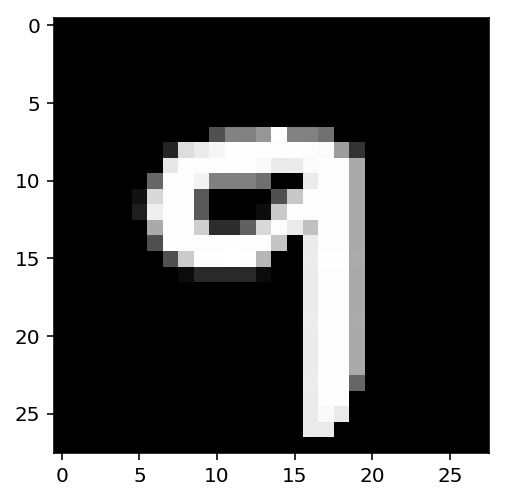

In [18]:
#Look at the image
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
#Sigmoid Activation Function
def activation(x):
    return (1/(1+torch.exp(-x)))

#Input 64x784
inputs=images.view(images.shape[0],-1)
#Number of input features-784
n_input=inputs.shape[1]
#Number of neurons in hidden layer-256
n_hidden=256
#Number of output neuron-10
n_out=10
#Weight at hidden neuron-784x256
W1=torch.randn(n_input,n_hidden)
#Bias at hidden neuron-256
B1=torch.randn(n_hidden)
#Weight at output neuron-256x10
W2=torch.randn(n_hidden,n_out)
#Bias at output neuron-10
B2=torch.randn(n_out)


In [20]:
print("Shape of a batch of an image:",images.shape)
print("Shape of the input to the network:",inputs.shape)
print("Shape of the input features:",n_input)
print("Shape of the Weight matrix of neurons in the hidden layer",W1.shape)
print("Shape of the Bias vector of neurons in the hidden layer",B1.shape)
print("Shape of the Weight matrix of neurons in the output layer",W2.shape)
print("Shape of the Bias vector of neurons in the output layer",W2.shape)


Shape of a batch of an image: torch.Size([64, 1, 28, 28])
Shape of the input to the network: torch.Size([64, 784])
Shape of the input features: 784
Shape of the Weight matrix of neurons in the hidden layer torch.Size([784, 256])
Shape of the Bias vector of neurons in the hidden layer torch.Size([256])
Shape of the Weight matrix of neurons in the output layer torch.Size([256, 10])
Shape of the Bias vector of neurons in the output layer torch.Size([256, 10])


In [0]:
#Hidden layer activations
h1=activation(torch.mm(inputs,W1)+B1)
#Output layer activations
out=activation(torch.mm(h1,W2)+B2)

In [22]:
print(f'Shape of the Hidden activation of the network{h1.shape}')
print(f'Shape of the Output of the network{out.shape}')

Shape of the Hidden activation of the networktorch.Size([64, 256])
Shape of the Output of the networktorch.Size([64, 10])


In [23]:
#Let us see the network output to one of the feeded input image
out[1]

tensor([9.2154e-01, 4.1177e-05, 1.0000e+00, 9.9978e-01, 7.6175e-01, 1.3460e-03,
        1.0000e+00, 1.4779e-06, 6.7857e-04, 1.0000e+00])

Now we have 10 outputs for our network. This raw output is usually called **logits or scores**.
<br>
However,We want to pass in an image to our network and get out a probability distribution over the classes that tells us the likely class(es) the image belongs to.


### Probability Distribution using Softmax
To calculate this probability distribution, we often use the [softmax function](https://en.wikipedia.org/wiki/Softmax_function)
$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$
What this does is squish each input $x_i$ between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.

In [0]:
def softmax(x):
    return(torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1))

Let us understand what we are doing above by an example
<br>
Step 1:Calculating the numerator of the softmax function

In [25]:
torch.exp(out[1:3])

tensor([[2.5132, 1.0000, 2.7183, 2.7177, 2.1420, 1.0013, 2.7183, 1.0000, 1.0007,
         2.7183],
        [2.7082, 1.0000, 2.7157, 2.7183, 1.0645, 1.0001, 2.7183, 1.0054, 1.0000,
         2.7181]])

Step 2:For every predicted image output, calculate the sum over the predicted values over all classes

In [26]:
#print(torch.sum(torch.exp(out[1:3])))
#Dim=1 says, we want to take the sum across all columns
torch.sum(torch.exp(out[1:3]),dim=1)

tensor([19.5298, 18.6485])

Step3:Rearrange the sums in an order for broadcasting to work

In [27]:
torch.sum(torch.exp(out[1:3]),dim=1).view(-1,1)

tensor([[19.5298],
        [18.6485]])

Step 3:For every predicted image output, divide the predictions of each class with the sum over all classes.

In [28]:
#print(torch.exp(out[1:3])/torch.sum(torch.exp(out[1:3]),dim=1))
temp=torch.exp(out[1:3])/torch.sum(torch.exp(out[1:3]),dim=1).view(-1,1)
print(temp)

tensor([[0.1287, 0.0512, 0.1392, 0.1392, 0.1097, 0.0513, 0.1392, 0.0512, 0.0512,
         0.1392],
        [0.1452, 0.0536, 0.1456, 0.1458, 0.0571, 0.0536, 0.1458, 0.0539, 0.0536,
         0.1458]])


Voila!! We got the softmax output .One last thing to do is check whether the sum across all classes sum to 1 for understanding the predicted class

In [29]:
temp.sum(dim=1)

tensor([1., 1.])

In [30]:
probabilities = softmax(out)
# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
#print(probabilities.sum(dim=1))

torch.Size([64, 10])


## Building our Network with Pytorch

![](images/mlp_mnist.png)

PyTorch provides a module `nn` that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units, 10 output units and a softmax output.

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden=nn.Linear(784,256)
        self.output=nn.Linear(256,10)
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        return x

Let's go through this bit by bit.

```python
class Network(nn.Module):
```

Here we're inheriting from `nn.Module`. Combined with `super().__init__()` this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from `nn.Module` when you're creating a class for your network. The name of the class itself can be anything.

```python
self.hidden = nn.Linear(784, 256)
```

This line creates a module for a linear transformation, $x\mathbf{W} + b$, with 784 inputs and 256 outputs and assigns it to `self.hidden`. The module automatically creates the weight and bias tensors which we'll use in the `forward` method. You can access the weight and bias tensors once the network once it's create at `net.hidden.weight` and `net.hidden.bias`.

```python
self.output = nn.Linear(256, 10)
```

Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

```python
self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
```

Here I defined operations for the sigmoid activation and softmax output. Setting `dim=1` in `nn.Softmax(dim=1)` calculates softmax across the columns.

```python
def forward(self, x):
```

PyTorch networks created with `nn.Module` must have a `forward` method defined. It takes in a tensor `x` and passes it through the operations you defined in the `__init__` method.

```python
x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
```

Here the input tensor `x` is passed through each operation a reassigned to `x`. We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. The order in which you define things in the `__init__` method doesn't matter, but you'll need to sequence the operations correctly in the `forward` method.

Now we can create a `Network` object.

In [33]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

We can define the network somewhat more concisely and clearly using the `torch.nn.functional` module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as `F`, `import torch.nn.functional as F`.


In [0]:
import torch.nn.functional as F

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 128)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [36]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

### Initializing weights and biases

The weights and bias are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `model.fc1.weight` for instance.

In [37]:
print(model.hidden.weight,model.hidden.weight.shape)
print(model.hidden.bias,model.hidden.bias.shape)

Parameter containing:
tensor([[ 0.0197, -0.0116,  0.0058,  ...,  0.0302,  0.0299, -0.0343],
        [ 0.0206,  0.0135,  0.0345,  ...,  0.0247, -0.0280,  0.0309],
        [ 0.0328,  0.0228,  0.0160,  ..., -0.0250, -0.0251,  0.0253],
        ...,
        [ 0.0225,  0.0256,  0.0272,  ...,  0.0159,  0.0133,  0.0227],
        [ 0.0063,  0.0204,  0.0154,  ...,  0.0120,  0.0228,  0.0085],
        [ 0.0172, -0.0254, -0.0014,  ..., -0.0239, -0.0123, -0.0082]],
       requires_grad=True) torch.Size([128, 784])
Parameter containing:
tensor([-3.4129e-02, -3.5023e-02, -2.4994e-02,  6.9522e-03,  2.4256e-02,
        -3.0995e-02,  1.8428e-02,  1.7995e-04,  3.5690e-02,  1.1080e-02,
        -2.5361e-02, -1.9550e-02, -4.1704e-03, -3.0963e-02, -2.3094e-03,
         2.3683e-02, -8.2089e-03,  3.5467e-02,  6.6356e-03,  9.0419e-04,
         9.8338e-03, -1.3634e-02, -2.2661e-02, -9.3643e-03,  2.4917e-02,
         3.0572e-02, -6.5517e-03,  3.5520e-02,  3.5385e-02, -3.1636e-02,
         1.2763e-02, -2.5896e-02, 

For custom initialization, we can these tensors in place.

In [38]:
# Set biases to all zeros
model.hidden.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
# sample from random normal with standard dev = 0.01
model.hidden.weight.data.normal_(std=0.01)

tensor([[-1.2083e-02,  1.3362e-02, -4.7883e-04,  ..., -1.9470e-02,
         -7.9714e-05, -2.3377e-02],
        [ 1.9217e-03, -7.4535e-03,  1.4575e-03,  ..., -3.4555e-03,
          5.4716e-03, -2.1791e-03],
        [-2.0988e-03,  9.7672e-03, -3.6484e-03,  ..., -6.3477e-03,
         -1.8276e-02,  9.4072e-03],
        ...,
        [ 3.9926e-03,  1.2083e-02, -5.4276e-03,  ..., -7.9789e-03,
          1.0731e-03,  3.9884e-03],
        [-2.4229e-03, -3.3990e-03,  6.5320e-03,  ...,  9.5462e-04,
          6.1829e-03, -1.6516e-02],
        [-2.5104e-03, -9.3102e-03,  5.5190e-03,  ..., -1.0905e-02,
         -1.3265e-02, -5.5200e-03]])

In [0]:
netowrk=Network()

### Forward pass

Now that we have a network, let's see what happens when we pass in an image.

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


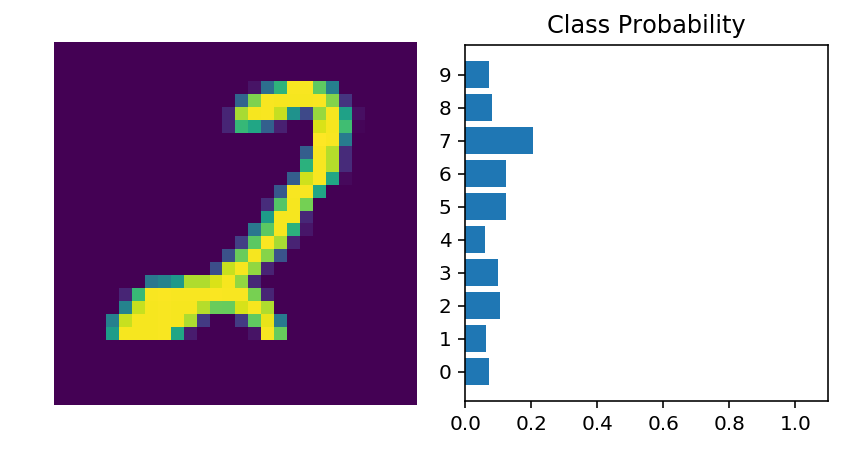

In [41]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(images.shape[0], 1, 784)

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, , all the weights are random!

## Add-on: People from the keras would love this!!!
PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, `nn.Sequential`.
Lets try to build the above network using this method:

In [42]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128]
output_size = 10

model=nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_sizes[0],output_size),
                    nn.ReLU(),
                    nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): ReLU()
  (4): Softmax()
)


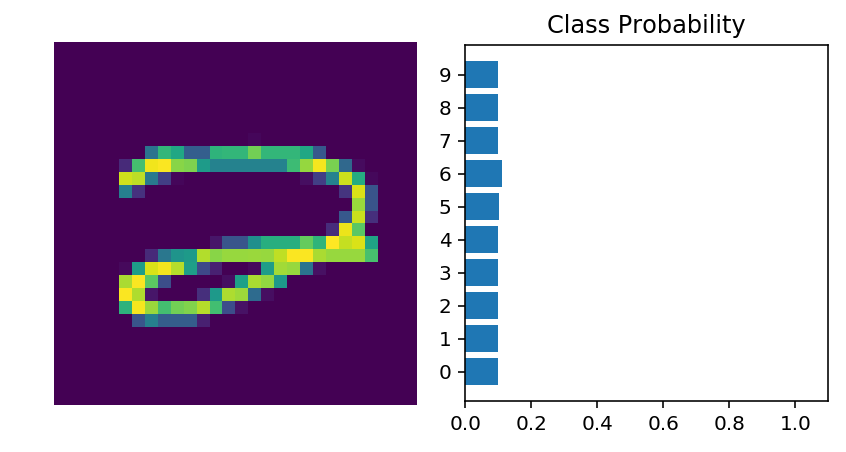

In [43]:
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

### Access Layers of the network
We can access layers  by integer 

In [44]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0193,  0.0175, -0.0097,  ..., -0.0264,  0.0135,  0.0245],
        [ 0.0010, -0.0323, -0.0246,  ...,  0.0255, -0.0211, -0.0345],
        [ 0.0170, -0.0030, -0.0328,  ...,  0.0156, -0.0089, -0.0116],
        ...,
        [ 0.0051, -0.0267, -0.0117,  ..., -0.0142,  0.0277,  0.0269],
        [-0.0048,  0.0291, -0.0253,  ...,  0.0246,  0.0038,  0.0083],
        [-0.0341, -0.0225, -0.0207,  ..., -0.0338,  0.0086,  0.0154]],
       requires_grad=True)

### Ordered Dict- Better way to create a network
We can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [45]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('hidden', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[0], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (output): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax()
)

### Access Layers using integer or name 
Now we can access layers  either by integer or name

In [46]:
print(model[0])
print(model.hidden)
print(model.hidden.weight)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
Parameter containing:
tensor([[-0.0213,  0.0055,  0.0044,  ...,  0.0216,  0.0212,  0.0184],
        [-0.0282,  0.0110, -0.0335,  ..., -0.0296, -0.0002, -0.0258],
        [-0.0075,  0.0346,  0.0275,  ...,  0.0115,  0.0269, -0.0081],
        ...,
        [-0.0204,  0.0250, -0.0245,  ...,  0.0287,  0.0189,  0.0337],
        [-0.0119,  0.0049, -0.0011,  ..., -0.0234, -0.0316,  0.0198],
        [ 0.0213, -0.0012, -0.0262,  ...,  0.0164,  0.0224,  0.0268]],
       requires_grad=True)


### Recollect everything 
Before we go ahead and train a neural network to accuractly predict the numbers appearing in the MNIST images,let us recollect the important modules that is necessary for any model training exercise

#### Imports

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,transforms

#### Load Data

In [48]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)

  0%|          | 16384/9912422 [00:00<01:11, 138201.55it/s]

9920512it [00:00, 31253957.04it/s]                          


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 445049.83it/s]
  1%|          | 16384/1648877 [00:00<00:11, 140432.12it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 6967617.90it/s]                           
8192it [00:00, 160376.67it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


#### Build a feedforward Network

In [0]:
# TODO: Build a feed-forward network in one of the three ways mentioned above:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))


#### Lets run one image through the network to check our work

In [50]:
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
print(logits.shape)

torch.Size([64, 10])


#### Define a loss function

In [0]:
criterion = nn.NLLLoss()

In [52]:
# Calculate the loss with the logits and the labels
loss=criterion(logits,labels)
print(loss)

tensor(2.3049, grad_fn=<NllLossBackward>)


## Autograd

Now that we know how to calculate a loss, how do we use it to perform backpropagation? Torch provides a module, `autograd`, for automatically calculating the gradients of tensors. We can use it to calculate the gradients of all our parameters with respect to the loss. Autograd works by keeping track of operations performed on tensors, then going backwards through those operations, calculating gradients along the way.

PyTorch keeps track of operations on a tensor and calculates the gradients, you need to set `requires_grad = True` on a tensor. You can do this at creation with the `requires_grad` keyword, or at any time with `x.requires_grad_(True)`.


Let's see an example to understand it better.Then again we will head back to our modelling task

In [53]:
x = torch.randn(2,2, requires_grad=True)
print("x:",x)
y = x**2
print("y:",y)
## grad_fn shows the function that generated this variable
print("y.grad_fn:",y.grad_fn)
z = y.mean()
print("z:",z)
print("x.grad:",x.grad)
z.backward()
print("x.grad:",x.grad)
print("x/2:",x/2)

x: tensor([[ 0.5090, -0.1186],
        [-0.6671, -0.0789]], requires_grad=True)
y: tensor([[0.2591, 0.0141],
        [0.4450, 0.0062]], grad_fn=<PowBackward0>)
y.grad_fn: <PowBackward0 object at 0x7f3d1d46e6a0>
z: tensor(0.1811, grad_fn=<MeanBackward0>)
x.grad: None
x.grad: tensor([[ 0.2545, -0.0593],
        [-0.3335, -0.0394]])
x/2: tensor([[ 0.2545, -0.0593],
        [-0.3335, -0.0394]], grad_fn=<DivBackward0>)


## Loss and Autograd together

In [54]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)


print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


## Defining the optimizer

In [0]:
from torch import optim
optimizer=optim.Adam(model.parameters(),lr=0.1)

## Training for real

In [59]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output=model.forward(images)
        # TODO: Training pass
        
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()*images.shape[0]
    else:
        print(f"Epoch:{e} Training loss: {running_loss/len(trainloader.dataset)}")

Epoch:0 Training loss: 1.1391830668767293
Epoch:1 Training loss: 1.2300454666773477
Epoch:2 Training loss: 1.4402017743428548
Epoch:3 Training loss: 1.687267345937093
Epoch:4 Training loss: 1.6394379685719809


In [0]:
%matplotlib inline
#import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
#helper.view_classify(img.view(1, 28, 28), ps)

## Inference and Validation

The goal of validation is to measure the model's performance on data that isn't part of the training set. Typically this is just accuracy, the percentage of classes the network predicted correctly. Other options are precision and recall and top-5 error rate. We'll focus on accuracy here. First I'll do a forward pass with one batch from the test set.

### Inference on a batch of images
Let us try to do this for a batch of images.Before that we will make some changes in our architecture

In [61]:
images, labels = next(iter(testloader))
images.shape,labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [62]:
images, labels = next(iter(testloader))
img = images.view(images.shape[0], 784)
# Get the class probabilities
ps = torch.exp(model(img))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [63]:
top_prob,top_class=ps.topk(1,dim=1)
top_prob.shape,top_class.shape

(torch.Size([64, 1]), torch.Size([64, 1]))

In [64]:
top_class.view(64)

tensor([6, 1, 3, 6, 3, 6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 6, 6, 6, 6, 6, 6, 3, 6, 3,
        6, 1, 6, 6, 3, 6, 6, 3, 1, 6, 3, 3, 3, 6, 6, 6, 3, 6, 6, 6, 6, 1, 6, 3,
        6, 3, 6, 1, 6, 6, 6, 6, 3, 0, 3, 3, 6, 6, 6, 3])

In [65]:
import pandas as pd
pd.DataFrame({"Predicted":top_class.view(top_class.shape[0]),"Actual":labels})

,Predicted,Actual
0,6,2
1,1,1
2,3,5
3,6,1
4,3,9
5,6,6
6,6,5
7,6,0
8,6,8
9,6,0


In [66]:
equals=top_class == labels.view(*top_class.shape)
accuracy=torch.mean(equals.type(torch.FloatTensor))
accuracy.item()

0.265625

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model=Network()
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()

In [68]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))    

Epoch: 1/5..  Training Loss: 0.402..  Test Loss: 0.204..  Test Accuracy: 0.947
Epoch: 2/5..  Training Loss: 0.300..  Test Loss: 0.193..  Test Accuracy: 0.952
Epoch: 3/5..  Training Loss: 0.319..  Test Loss: 0.197..  Test Accuracy: 0.955
Epoch: 4/5..  Training Loss: 0.276..  Test Loss: 0.190..  Test Accuracy: 0.954
Epoch: 5/5..  Training Loss: 0.279..  Test Loss: 0.190..  Test Accuracy: 0.960


In [69]:
running_loss

16732.30222570896

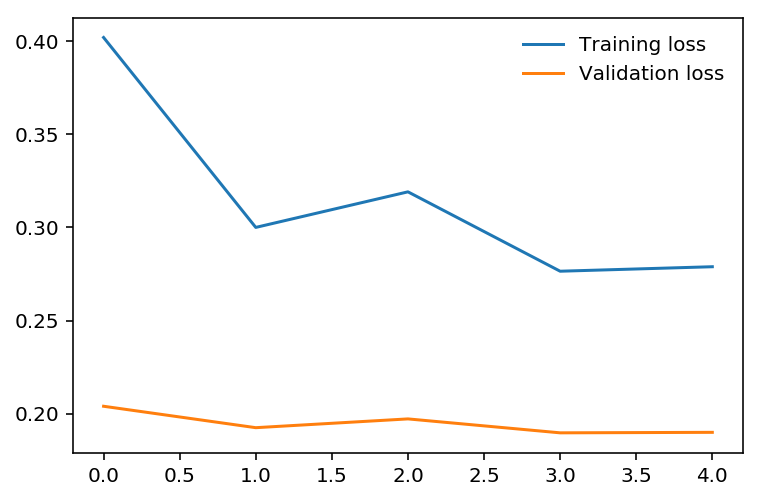

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Inference time

In [72]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
top_prob,top_class=ps.topk(1,dim=1)
top_class.item(),labels[0]

(8, tensor(8))

The parameters for PyTorch networks are stored in a model's state_dict
 Optimizer objects (torch.optim) also have a state_dict, which contains information about the optimizer’s state, as well as the hyperparameters used.

Because state_dict objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers.

In [73]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([256, 784])
fc1.bias 	 torch.Size([256])
fc2.weight 	 torch.Size([128, 256])
fc2.bias 	 torch.Size([128])
fc3.weight 	 torch.Size([64, 128])
fc3.bias 	 torch.Size([64])
fc4.weight 	 torch.Size([10, 64])
fc4.bias 	 torch.Size([10])


In [74]:
# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {139900461526256: {'step': 4690, 'exp_avg': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'exp_avg_sq': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}, 139900461526328: {'step': 4690, 'exp_avg': tensor([ 5.6052e-45, -9.0633e-05, -2.0838e-18,  5.6052e-45,  5.6052e-45,
        -2.1870e-05, -1.6081e-04, -1.2594e-03, -1.9198e-04,  3.1295e-38,
        -4.9848e-04,  2.1075e-03, -1.6403e-23, -4.4465e-04,  2.8305e-04,
        -6.0509e-41,  5.6052e-45,  5.6052e-45,  5.6052e-45,  5.6052e-45,
         5.7103e-04, -4.9331e-04, -1.4567e-03,  5.6052e-45, -9.3

#  Try Running the below codes on  Kaggle Kernel

[Check for reference](https://www.kaggle.com/u6yuvi/digit-recognizer-pytorch/output?scriptVersionId=16485375)

# Kaggle- Multilayered Perceptron (MLP) implemention on MNIST dataset
Untill now we were using the MNIST dataset that is available in torchvision.dataset.Let us now load the dataset from Kaggle repo and train our model

In [0]:
import os
from pathlib import Path
import torch
from torch.utils.data import TensorDataset ,DataLoader
from torch import nn,optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
PATH=Path("../input/digit-recognizer")
print(os.listdir("../input/digit-recognizer"))

## Load Data 

In [0]:
train=pd.read_csv(PATH/'train.csv')
test=pd.read_csv(PATH/'test.csv')
train.shape,test.shape

## Extracting Input and Target Variable

In [0]:
x=train.drop("label",axis=1)
y=np.array(train['label'])
x.shape,y.shape

## Normalization 

In [0]:
#x_train=x/255

## Train Test Split

In [0]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

## Train Test in Pytorch

In [0]:
'''
# create feature and targets tensor for train set.
torch_X_train = torch.from_numpy(x_train.values).type(torch.FloatTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor)

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(x_test.values).type(torch.FloatTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)
'''

In [0]:
'''
BATCH_SIZE=64
# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)
'''

## Train -Test Split -Pytorch

In [0]:
torch_X_train = torch.from_numpy(x.values).type(torch.FloatTensor)/255
torch_y_train = torch.from_numpy(y).type(torch.LongTensor)
myDataset = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
valid_no  = int(0.2 * len(myDataset))
# so divide the data into trainset and testset
trainSet,testSet = torch.utils.data.random_split(myDataset,(len(myDataset)-valid_no,valid_no))
print(f"len of trainSet {len(trainSet)} , len of testSet {len(testSet)}")
batch_size=64
train_loader  = DataLoader(trainSet , batch_size=batch_size ,shuffle=True) 
test_loader  = DataLoader(testSet , batch_size=batch_size ,shuffle=True)

trainData = torch.from_numpy(x_train.values)
trainLabel=torch.from_numpy(y_train)
testData = torch.from_numpy(x_test.values)
testLabel = torch.from_numpy(y_test)
trainData, testData = trainData.type(torch.FloatTensor), testData.type(torch.LongTensor)
trainLabel, testLabel = trainLabel.type(torch.FloatTensor), testLabel.type(torch.LongTensor)
trainData.shape,testData.shape
trainData = trainData.unsqueeze_(dim=1)
testData = testData.unsqueeze_(dim=1)
trainData.shape,testData.shape
transforms =transforms.Compose(transforms.ToTensor())
train_dataset = TensorDataset(trainData,trainLabel)
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)

test_dataset = TensorDataset(testData,testLabel)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=True)

## Network

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model=Network()
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()

## Train 

In [0]:
epochs=5
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in train_loader:
        optimizer.zero_grad()
        log_ps=model(images)
        loss=criterion(log_ps,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in test_loader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels)
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.mean(equals.type(torch.FloatTensor))
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))    

## Save our model

In [0]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')

## Load our model

In [0]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

In [0]:
model.load_state_dict(state_dict)

In [0]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [256,128,64],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

## Load Test Data

In [0]:
test_images = pd.read_csv("../input/digit-recognizer/test.csv")
test_image = test_images.loc[:,test_images.columns != "label"].values
test_dataset = torch.from_numpy(test_image).type(torch.FloatTensor)/255
print(test_dataset.shape)
#test_dataset = torch.utils.data.TensorDataset(test_dataset)
new_test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 100, shuffle = False)

In [0]:
results = []
with torch.no_grad():
    model.eval()
    for images in new_test_loader:
        output = model(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim = 1)
        results += top_class.numpy().tolist()

## Check the results

In [0]:
predictions = np.array(results).flatten()
print(predictions[:5])
print(predictions.shape)

## Submit for Scoring

In [0]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("my_submissions.csv", index=False, header=True)

# Reference

[Introduction to Pytorch-Udacity](https://github.com/udacity/deep-learning-v2-pytorch/tree/master/intro-to-pytorch)